# Vectorization for Recommender
- Term-document matrix <br>
자연어처리에서 가장 기본적인 벡터화 방법

- 숫자로 표현된 것은 기본적으로 사용할 수 있음


### Vector
- 숫자를 공간에 표현
- 차원이 늘어날수록 사람이 확인할 수 있게 표현하기 힘들다. (공간의 특정한 점이라고 개념적으로 인식)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Example Vector
price = np.array([0, 15000, 30000])
screen_size = np.array([0, 13, 16])
df = pd.DataFrame({'Price Difference': price, 'Screen Size': screen_size, 'Label': ['Origin', 'Vector 1', 'Vector 2']})

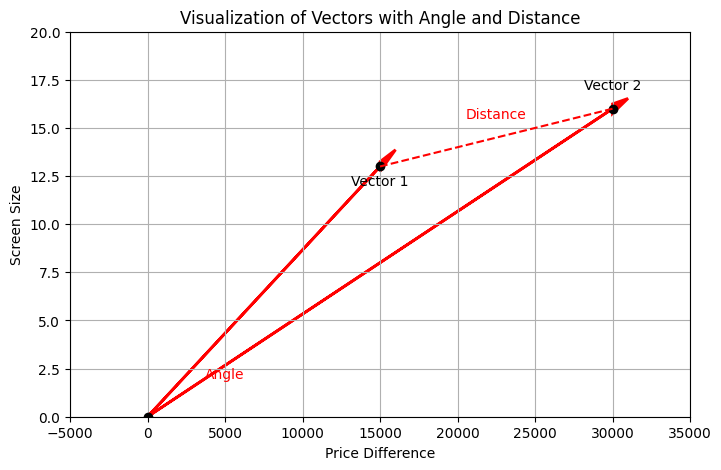

In [3]:
# Visualization
plt.figure(figsize=(8, 5))

plt.plot(price, screen_size, 'ko') 

plt.arrow(0, 0, price[1], screen_size[1], head_width=0.5, head_length=1000, fc='red', ec='red', lw=2)
plt.arrow(0, 0, price[2], screen_size[2], head_width=0.5, head_length=1000, fc='red', ec='red', lw=2)

mid_price = (price[1] + price[2]) / 2
mid_screen_size = (screen_size[1] + screen_size[2]) / 2

plt.plot([price[1], price[2]], [screen_size[1], screen_size[2]], 'r--')

distance = np.sqrt((price[2] - price[1])**2 + (screen_size[2] - screen_size[1])**2)

plt.text(price[1], screen_size[1] - 1, 'Vector 1', fontsize=10, ha='center')
plt.text(price[2], screen_size[2] + 1, 'Vector 2', fontsize=10, ha='center')

plt.text(5000, 2, 'Angle', fontsize=10, color='red', ha='center')
plt.text(mid_price, mid_screen_size + 1, 'Distance', fontsize=10, color='red', ha='center')

plt.xlabel('Price Difference')
plt.ylabel('Screen Size')
plt.title('Visualization of Vectors with Angle and Distance')

plt.xlim(-5000, 35000)
plt.ylim(0, 20)

plt.grid()
plt.show()


### Calculating Similarity
- 주로 많이 사용됨
- 유클리디안 거리는 군집화에 많이 사용됨

In [4]:
# 4개의 차원을 가진 벡터
# 각 차원은 특징을 의미
아이패드9_vec = np.array([9, 10.2, 64, 248.39])
아이패드9_vec

# 만약 [10.2, 11, 248.39, 128] 과 같이 차원의 특징이 다르다면 비교할 수 없게 됨 -> 각 차원의 특징을 일치시켜야 함
# 동일한 방식으로 정보(벡터)를 수집한 다음 벡터들을 비교

array([  9.  ,  10.2 ,  64.  , 248.39])

In [6]:
# 벡터들을 코사인유사도를 통해 비교하기
상품1 = np.array([9, 10.2, 64, 248.39])
상품1
상품2 = np.array((7.0, 12.4, 256.0, 322.17))
상품5 = np.array((8.0, 8.7, 128.0, 189.39))

In [7]:
상품1, 상품2, 상품5

(array([  9.  ,  10.2 ,  64.  , 248.39]),
 array([  7.  ,  12.4 , 256.  , 322.17]),
 array([  8.  ,   8.7 , 128.  , 189.39]))

In [12]:
def cos_sim(vec1:np.ndarray, vec2:np.ndarray):
    return np.sum(vec1 * vec2) / (np.sum(vec1**2) ** (1/2) * np.sum(vec2**2) ** (1/2))

In [19]:
print(cos_sim(상품1, 상품1)) # 각도가 0
print(cos_sim(상품1, 상품2))
print(cos_sim(상품1, 상품5))

# 서로 비슷한 방향을 바라보고 있을 수록 높은 값을 가짐
# 계산 대상이 만약 수없이 많아지면 cos_sim 계산이 횟수가 굉장히 많아지게 됨 -> 최적화 필요. (넘파이의 기능이나 라이브러리 사용)

1.0000000000000002
0.9133496888508772
0.9421886392241037


#### Points to Consider
- When dimensions and content differ:
    - For example, recommending a product that is not related to an iPad, like an SSD.
    - How do you make recommendations when the feature dimensions are completely different?
    - Even if the dimensions are aligned, they may not have the same value or meaning.<br/>
<br/>

- Categorical data:
    - Can be represented through encoding.
    - Term-document matrix: a fundamental vectorization technique in natural language processing.
    - What criteria should be used for representation? (This applies not only to text but also to other unstructured data processing.)

# Types of Recommender Systems

- 지도 학습법 : 타겟이 있음 (새로운 고객, 상품이 추가되었을 때는 불가능한 케이스가 많음)
- 클러스터링 : 유저를 벡터화하고 군집화하고 묶음 

- Content-Based Filtering
    - 사용자가 특정한 아이템을 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식
    - 벡터 - 이미지, 음성, 상품 설명서, 리뷰 등 컨텐츠에 대한 설명<br/>
<br/>

- Collaborative Filtering
    - 사용자와 아이템 간의 상호 상관 관계를 분석하여 새로운 사용자-아이템 관계를 찾아주는 것으로 사용자의 과거 경험과 User Behavier에 의존하여 추천하는 시스템
    - 장바구니 분석
    - 소비 여부, 선호도를 조사 - 개인화된 추천 시스템 개발 가능
    - 벡터 - 소비 여부, 아이템에 대한 평가, 리뷰 데이터<br/>
<br/>

- Hybrid filtering
    - 두 방식을 함께 사용
    - 만약 신제품이 나타나 그 제품을 구매한 소비자가 없는 경우 협업필터링 사용할 수 없다.(콜드 스타트)
        - Content-Based Filtering은 사용 가능 (유사한 상품 비교)
        - 신규 상품에 추천 가중치를 부여하는 방법도 있다. 
    - 이런 겨우 둘을 혼합해서 사용
        - 신규제품에는 Content-Based Filtering, 오래되어 user action 이 쌓인 경우 선호도 데이터를 사용하는 Collaborative Filtering을 사용

In [7]:
# A matrix representing the correlation between users and products.
# Comparing users (rows) is collaborative filtering.
# Comparing products (columns) is content-based filtering.
# Similar to TDM

import pandas as pd

data = {
    'User': ['User 1', 'User 2', 'User 3', 'User 4', 'User 5'],
    'Meat': [5, 1, 0, 4, 2],
    'Beer': [3, 0, 1, 2, 4],
    'Sugar': [1, 0, 1, 3, 1],
    'Milk': [2, 3, 0, 5, 1],
    'Bread': [0, 2, 4, 1, 3]
}

df = pd.DataFrame(data)
print(df)

     User  Meat  Beer  Sugar  Milk  Bread
0  User 1     5     3      1     2      0
1  User 2     1     0      0     3      2
2  User 3     0     1      1     0      4
3  User 4     4     2      3     5      1
4  User 5     2     4      1     1      3


Recommendation Methods

- if two users have high similarity, a product that one user has not consumed can be recommended to them.
- SVD(유저, 아이템에 대한 잠재 벡터를 생성) 방법을 사용할 수도 있음

# Movie Recommender System

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

movies = pd.read_csv(r'DATA\tmdb_5000_movies.csv')
print(movies.shape)

(4803, 20)


## Data Preprocessing

In [2]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
# check columns
movies.head(2).T

,0,1
budget,237000000,300000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/
id,19995,285
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
original_language,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha..."
popularity,150.437577,139.082615
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."


### EDA, Feature Selection

- Columns
    - id : 영화 아이디
    - title : 영화명
    - genres : 영화 장르
    - vote_average : 영화 평균 평점
    - vote_count : 영화 투표수
    - popularity : 영화 인기
    - keywords : 영화 키워드
    - overview : 영화 개요

In [14]:
movies_df = movies[['id', 'title', 'genres', 'vote_average', 'vote_count', 'popularity', 'keywords', 'overview']]
movies_df.head(2)

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."


자료형을 확인

In [4]:
movies['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [11]:
# genres, keywords의 타입이 str인 것을 발견
type(['genres'][0])

str

str형을 활용하기는 힘드니 json으로 변경 혹은 eval을 활용해 문자열을 list, dict 자료형으로 바꿔준다.

In [6]:
# import json
# json.loads(movies['genres'][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [7]:
# eval(movies['genres'][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
# movies_df['genres'] = movies_df['genres'].apply(json.loads)
# movies_df['keywords'] = movies_df['keywords'].apply(json.loads)
# movies_df.head(2)

In [15]:
movies_df['genres'] = movies_df['genres'].apply(eval)
movies_df['keywords'] = movies_df['keywords'].apply(eval)
movies_df.head(2)


,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7.2,11800,150.437577,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,4500,139.082615,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","Captain Barbossa, long believed to be dead, ha..."


In [16]:
movies_df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

genres, keywords에서 id값 제거

In [17]:
movies_df['genres'] = movies_df['genres'].apply(lambda x : [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [y['name'] for y in x])
movies_df.head(2)

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",7.2,11800,150.437577,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,4500,139.082615,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha..."


genres를 list -> 하나로 연결한 문자열로 만들어준다.

In [18]:
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
movies_df.head(2)

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",7.2,11800,150.437577,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,4500,139.082615,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action


DTM으로 벡터화

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=0.0, ngram_range=(1, 2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])

# ngram 결과의 차원
print(genre_mat.shape)

(4803, 276)


In [26]:
len(movies_df)

4803

In [28]:
# genre_mat의 자료형은 sparse matrix - 0값은 버리고 숫자값이 있는 것의 위치를 저장
# (특정 유저, 특정 영화, 1)
type(genre_mat)


scipy.sparse._csr.csr_matrix

## Calculating Cos Similarity

In [34]:
genre_mat.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

cosine similarity 계산법

In [41]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

cos_similarity(np.array((7.0, 12.4, 256.0, 322.17)), np.array((7.0, 12.4, 256.0, 322.17)))

0.9999999999999998

scipy.sparse의 csr_matrix 형식을 사용하여 희소 행렬에 대해 cosine similarity 계산
1. 각 벡터의 내적 계산.
2. 각 벡터의 L2 노름 계산.
3. 코사인 유사도 계산.

In [44]:
from scipy.sparse import csr_matrix

def cos_similarity_sparse(v1, v2):
    """희소 행렬 간의 코사인 유사도를 직접 계산하는 함수."""
    # 희소 행렬 간의 내적 계산
    dot_product = v1.dot(v2.T)
    
    # 각 벡터의 L2 노름 계산
    norm_v1 = np.sqrt(v1.multiply(v1).sum(axis=1))
    norm_v2 = np.sqrt(v2.multiply(v2).sum(axis=1))
    
    # 노름 간의 외적 계산
    norm_product = norm_v1.dot(norm_v2.T)
    
    # 코사인 유사도 계산
    similarity = dot_product / norm_product
    return similarity

# 희소 행렬로 변환 (예시로 count_vect.fit_transform 결과 사용)
genre_mat_sparse = csr_matrix(genre_mat)

# 코사인 유사도 계산
cos_sim = cos_similarity_sparse(genre_mat_sparse, genre_mat_sparse)

print(cos_sim)

[[1.         0.59628479 0.4472136  ... 0.                nan 0.        ]
 [0.59628479 1.         0.4        ... 0.                nan 0.        ]
 [0.4472136  0.4        1.         ... 0.                nan 0.        ]
 ...
 [0.         0.         0.         ... 1.                nan 0.        ]
 [       nan        nan        nan ...        nan        nan        nan]
 [0.         0.         0.         ... 0.                nan 1.        ]]


scikit-learn의 cosine_similarity 사용

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


genre_sim에서 특정 영화와 유사도가 높은 순서대로 정렬
- argsort : 값들의 배열에서 데이터를 정렬한 index 반환

In [47]:
# 내림차순 정렬을 위해 -1 옵션 추가
genre_sim_sorted_idx = genre_sim.argsort()[:,::-1]
print(genre_sim_sorted_idx)

[[   0 3494  813 ... 3038 3037 2401]
 [ 262    1  129 ... 3069 3067 2401]
 [   2 1740 1542 ... 3000 2999 2401]
 ...
 [4800 3809 1895 ... 2229 2230    0]
 [4802 1594 1596 ... 3204 3205    0]
 [4802 4710 4521 ... 3140 3141    0]]


0번째와 3494번째 영화가 유사함을 알 수 있다. (장르의 유사도를 분석한 것이기 때문)

In [48]:
movies_df.iloc[0]

id                                                            19995
title                                                        Avatar
genres                [Action, Adventure, Fantasy, Science Fiction]
vote_average                                                    7.2
vote_count                                                    11800
popularity                                               150.437577
keywords          [culture clash, future, space war, space colon...
overview          In the 22nd century, a paraplegic Marine is di...
genres_literal             Action Adventure Fantasy Science Fiction
Name: 0, dtype: object

In [49]:
movies_df.iloc[3494]

id                                                            27549
title                     Beastmaster 2: Through the Portal of Time
genres                [Action, Adventure, Fantasy, Science Fiction]
vote_average                                                    4.6
vote_count                                                       17
popularity                                                 1.478505
keywords          [based on novel, time travel, sequel, psychotr...
overview          Mark Singer returns as Dar, the warrior who ca...
genres_literal             Action Adventure Fantasy Science Fiction
Name: 3494, dtype: object

### 추천 영화 DataFrame 반환 함수

In [56]:
def find_sim_movie(df, sorted_idx, title_name, top_n=10):
    title_movie = df[df['title']==title_name]
    
    title_index = title_movie.index.values
    similar_indexes = sorted_idx[title_index, :(top_n)]
    
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_idx, "The Godfather", 10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


투표 수가 적으면 평점이 유효한지 판단할 수 없다.

In [53]:
movies_df[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


가중치를 지정

- v: 개별 영화에 평점을 투표한 횟수
- m: 평점을 부여하기 위한 최소 투표 횟수
- R: 개별 영화에 대한 평균 평점
- C: 전체 영화에 대한 평균 평점

최소 투표 횟수를 전체의 60% 지점으로 지정

In [54]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ((v/(v+m)) * R) + ((m / (v + m)) * C)

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)
movies_df.head(2)

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal,weighted_vote
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",7.2,11800,150.437577,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,7.166301
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,4500,139.082615,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,6.838594


가중치평점을 적용한 추천 영화 DataFrame 반환 함수

In [60]:
def find_sim_movie(df, sorted_idx, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    
    title_index = title_movie.index.values
    similar_indexes = sorted_idx[title_index, : (top_n * 2)]
    
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_idx, 'The Godfather', 10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866 3112 4041  588 3337
  3378  281 1663 1464 1149 2839]]


,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


## Content-Based Filtering

In [ ]:
import pandas as pd
import numpy as np
import warning; warnings.filterings('ignore')

### Data Preparation

## Collaborative Filtering